In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('myleft.jpg', cv.IMREAD_GRAYSCALE)  #queryimage # left image
img2 = cv.imread('myright.jpg', cv.IMREAD_GRAYSCALE) #trainimage # right image
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [ ]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [ ]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

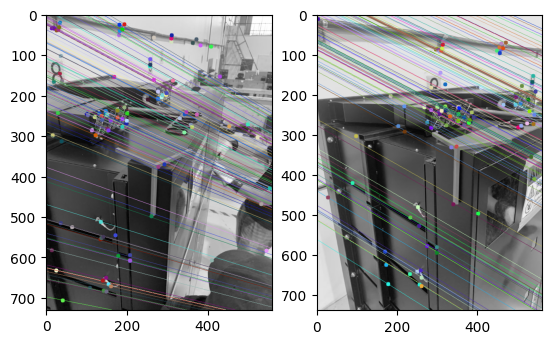

In [ ]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [ ]:
import cv2
import numpy as np

# Load images
img1 = cv2.imread('myimage1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('myimage2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x:x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Calculate the fundamental matrix
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

print("Fundamental Matrix Image 1 and Image 2:\n", F)

Fundamental Matrix:
 [[ 4.12900223e-06  1.49371328e-05 -5.55988143e-03]
 [-2.26897770e-05  1.59312707e-06  7.64440991e-03]
 [ 4.66256293e-03 -9.71780862e-03  1.00000000e+00]]


In [ ]:
import cv2
import numpy as np

# Load images
img1 = cv2.imread('myimage1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('myimage3.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x:x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Calculate the fundamental matrix
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

print("Fundamental Matrix Image 1 and Image 3:\n", F)

Fundamental Matrix Image 1 and Image 3:
 [[ 1.26391087e-07 -1.17661601e-06  1.64633592e-04]
 [ 1.93715529e-05  9.47516614e-06 -7.40237810e-03]
 [-3.46817411e-03  1.95496715e-04  1.00000000e+00]]


In [ ]:
import cv2
import numpy as np

# Load images
img1 = cv2.imread('myimage1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('myimage4.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x:x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Calculate the fundamental matrix
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

print("Fundamental Matrix Image 1 and Image 4:\n", F)

Fundamental Matrix Image 1 and Image 4:
 [[ 1.47370672e-06  7.11739848e-06 -4.67454282e-03]
 [-4.67794202e-06  2.37012989e-06 -8.57161763e-03]
 [ 4.87967343e-03  5.99567000e-03  1.00000000e+00]]


In [ ]:
import cv2
import numpy as np

# Load images
img1 = cv2.imread('myimage1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('myimage5.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x:x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Calculate the fundamental matrix
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

print("Fundamental Matrix Image 1 and Image 5:\n", F)

Fundamental Matrix Image 1 and Image 5:
 [[ 4.18689203e-06  7.32449668e-06 -2.13751349e-03]
 [-4.14547084e-06  1.42428664e-05 -1.88991748e-03]
 [ 3.67662041e-04 -5.72918233e-03  1.00000000e+00]]


In [ ]:
import cv2
import numpy as np

# Load images
img1 = cv2.imread('myimage1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('myimage6.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x:x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Calculate the fundamental matrix
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

print("Fundamental Matrix Image 1 and Image 6:\n", F)

Fundamental Matrix Image 1 and Image 6:
 [[ 6.01768858e-06  1.35856202e-05 -4.29543623e-03]
 [ 1.57043736e-05 -1.98085797e-05 -3.74989187e-04]
 [-3.34144624e-03 -4.78841199e-04  1.00000000e+00]]


In [ ]:
#10 Point Epipolar

In [ ]:
# IMG 1
import numpy as np
import cv2
import math

def rotationMatrixToEulerAngles(R):
    """
    Convert a rotation matrix to Euler angles (roll, pitch, yaw).
    Rotation order is assumed to be ZYX (roll around X, pitch around Y, yaw around Z).
    """
    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])

    singular = sy < 1e-6

    if not singular:
        # Roll (X-axis rotation)
        x = math.atan2(R[2, 1], R[2, 2])
        # Pitch (Y-axis rotation)
        y = math.atan2(-R[2, 0], sy)
        # Yaw (Z-axis rotation)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        # Gimbal lock case
        # Roll (X-axis rotation)
        x = math.atan2(-R[1, 2], R[1, 1])
        # Pitch (Y-axis rotation)
        y = math.atan2(-R[2, 0], sy)
        # Yaw (Z-axis rotation)
        z = 0

    return np.array([x, y, z])

def main():
    # Input camera intrinsic parameters
    print("Enter the camera intrinsic parameters:")
    f = float(input("Focal length (in mm): "))
    sensor_width = float(input("Sensor width (in mm): "))
    sensor_height = float(input("Sensor height (in mm): "))
    image_width = int(input("Image width (in pixels): "))
    image_height = int(input("Image height (in pixels): "))

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    print("\nCamera Intrinsic Matrix K:\n", K)

    # Define the 3D world points (in meters)
    obj_points = np.array([
        [0.00, 0.00, 0.00],
        [0.15, 0.00, 0.00],
        [0.00, 0.15, 0.00],
        [0.00, 0.00, 0.15],
        [0.15, 0.01, 0.00],
        [0.15, 0.00, 0.01],
        [0.01, 0.15, 0.00],
        [0.00, 0.15, 0.01],
        [0.01, 0.00, 0.15],
        [0.00, 0.01, 0.15]
    ], dtype=np.float32)

    # Input the 2D image coordinates
    print("\nEnter the image coordinates for the corresponding 3D points:")
    img_points = []
    for i in range(len(obj_points)):
        Xi = float(input(f"X{i+1}: "))
        Yi = float(input(f"Y{i+1}: "))
        img_points.append([Xi, Yi])

    img_points = np.array(img_points, dtype=np.float32)

    # Assume no lens distortion
    dist_coeffs = np.zeros((4,1))

    # Solve for rotation and translation vectors using solvePnP with ITERATIVE method
    success, rvec, tvec = cv2.solvePnP(
        obj_points, img_points, K, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

    if not success:
        print("Could not solve PnP problem.")
        return

    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(rvec)

    # Camera position in world coordinates is -R.T * tvec
    camera_position = -np.matmul(R.T, tvec)

    print("\nCamera Position in World Coordinates (in meters):")
    print("X: {:.6f}".format(camera_position[0][0]))
    print("Y: {:.6f}".format(camera_position[1][0]))
    print("Z: {:.6f}".format(camera_position[2][0]))

    # Compute Euler angles from rotation matrix
    euler_angles = rotationMatrixToEulerAngles(R)

    # Convert radians to degrees
    euler_angles_deg = np.degrees(euler_angles)

    print("\nCamera Orientation in Euler Angles (degrees):")
    print("Roll (X axis): {:.6f}".format(euler_angles_deg[0]))
    print("Pitch (Y axis): {:.6f}".format(euler_angles_deg[1]))
    print("Yaw (Z axis): {:.6f}".format(euler_angles_deg[2]))

if __name__ == "__main__":
    main()


Enter the camera intrinsic parameters:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Camera Intrinsic Matrix K:
 [[3.03113208e+03 0.00000000e+00 1.51200000e+03]
 [0.00000000e+00 3.03292035e+03 2.01600000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Enter the image coordinates for the corresponding 3D points:
X1: 1863
Y1: 2219
X2: 2592
Y2: 2322
X3: 1843
Y3: 1453
X4: 1542
Y4: 2410
X5: 2587
Y5: 2273
X6: 2559
Y6: 2336
X7: 1889
Y7: 1464
X8: 1819
Y8: 1478
X9: 1587
Y9: 2414
X10: 1524
Y10: 2365

Camera Position in World Coordinates (in meters):
X: -0.226304
Y: -0.151183
Z: -0.437125

Camera Orientation in Euler Angles (degrees):
Roll (X axis): -157.775094
Pitch (Y axis): 19.016851
Yaw (Z axis): -171.200396


In [ ]:
# IMG 2
import numpy as np
import cv2
import math

def rotationMatrixToEulerAngles(R):
    """
    Convert a rotation matrix to Euler angles (roll, pitch, yaw).
    Rotation order is assumed to be ZYX (roll around X, pitch around Y, yaw around Z).
    """
    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])

    singular = sy < 1e-6

    if not singular:
        # Roll (X-axis rotation)
        x = math.atan2(R[2, 1], R[2, 2])
        # Pitch (Y-axis rotation)
        y = math.atan2(-R[2, 0], sy)
        # Yaw (Z-axis rotation)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        # Gimbal lock case
        # Roll (X-axis rotation)
        x = math.atan2(-R[1, 2], R[1, 1])
        # Pitch (Y-axis rotation)
        y = math.atan2(-R[2, 0], sy)
        # Yaw (Z-axis rotation)
        z = 0

    return np.array([x, y, z])

def main():
    # Input camera intrinsic parameters
    print("Enter the camera intrinsic parameters:")
    f = float(input("Focal length (in mm): "))
    sensor_width = float(input("Sensor width (in mm): "))
    sensor_height = float(input("Sensor height (in mm): "))
    image_width = int(input("Image width (in pixels): "))
    image_height = int(input("Image height (in pixels): "))

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    print("\nCamera Intrinsic Matrix K:\n", K)

    # Define the 3D world points (in meters)
    obj_points = np.array([
        [0.00, 0.00, 0.00],
        [0.15, 0.00, 0.00],
        [0.00, 0.15, 0.00],
        [0.00, 0.00, 0.15],
        [0.15, 0.01, 0.00],
        [0.15, 0.00, 0.01],
        [0.01, 0.15, 0.00],
        [0.00, 0.15, 0.01],
        [0.01, 0.00, 0.15],
        [0.00, 0.01, 0.15]
    ], dtype=np.float32)

    # Input the 2D image coordinates
    print("\nEnter the image coordinates for the corresponding 3D points:")
    img_points = []
    for i in range(len(obj_points)):
        Xi = float(input(f"X{i+1}: "))
        Yi = float(input(f"Y{i+1}: "))
        img_points.append([Xi, Yi])

    img_points = np.array(img_points, dtype=np.float32)

    # Assume no lens distortion
    dist_coeffs = np.zeros((4,1))

    # Solve for rotation and translation vectors using solvePnP with ITERATIVE method
    success, rvec, tvec = cv2.solvePnP(
        obj_points, img_points, K, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

    if not success:
        print("Could not solve PnP problem.")
        return

    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(rvec)

    # Camera position in world coordinates is -R.T * tvec
    camera_position = -np.matmul(R.T, tvec)

    print("\nCamera Position in World Coordinates (in meters):")
    print("X: {:.6f}".format(camera_position[0][0]))
    print("Y: {:.6f}".format(camera_position[1][0]))
    print("Z: {:.6f}".format(camera_position[2][0]))

    # Compute Euler angles from rotation matrix
    euler_angles = rotationMatrixToEulerAngles(R)

    # Convert radians to degrees
    euler_angles_deg = np.degrees(euler_angles)

    print("\nCamera Orientation in Euler Angles (degrees):")
    print("Roll (X axis): {:.6f}".format(euler_angles_deg[0]))
    print("Pitch (Y axis): {:.6f}".format(euler_angles_deg[1]))
    print("Yaw (Z axis): {:.6f}".format(euler_angles_deg[2]))

if __name__ == "__main__":
    main()


Enter the camera intrinsic parameters:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Camera Intrinsic Matrix K:
 [[3.03113208e+03 0.00000000e+00 1.51200000e+03]
 [0.00000000e+00 3.03292035e+03 2.01600000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Enter the image coordinates for the corresponding 3D points:
X1: 1467
Y1: 2023
X2: 1952
Y2: 2239
X3: 1443
Y3: 1362
X4: 951.9
Y4: 2253
X5: 1948
Y5: 2200
X6: 1917
Y6: 2252
X7: 1476
Y7: 1384
X8: 1408
Y8: 1383
X9: 990.1
Y9: 2265
X10: 952.8
Y10: 2208

Camera Position in World Coordinates (in meters):
X: -0.356271
Y: -0.244835
Z: -0.336514

Camera Orientation in Euler Angles (degrees):
Roll (X axis): -143.312697
Pitch (Y axis): 41.357946
Yaw (Z axis): -155.778240


In [ ]:
import numpy as np
import cv2
import math

def rotationMatrixToEulerAngles(R):
    """
    Convert a rotation matrix to Euler angles (roll, pitch, yaw).
    Rotation order is assumed to be ZYX (roll around X, pitch around Y, yaw around Z).
    """
    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])

    singular = sy < 1e-6

    if not singular:
        # Roll (X-axis rotation)
        x = math.atan2(R[2, 1], R[2, 2])
        # Pitch (Y-axis rotation)
        y = math.atan2(-R[2, 0], sy)
        # Yaw (Z-axis rotation)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        # Gimbal lock case
        # Roll (X-axis rotation)
        x = math.atan2(-R[1, 2], R[1, 1])
        # Pitch (Y-axis rotation)
        y = math.atan2(-R[2, 0], sy)
        # Yaw (Z-axis rotation)
        z = 0

    return np.array([x, y, z])

def main():
    # Input camera intrinsic parameters
    print("Enter the camera intrinsic parameters:")
    f = float(input("Focal length (in mm): "))
    sensor_width = float(input("Sensor width (in mm): "))
    sensor_height = float(input("Sensor height (in mm): "))
    image_width = int(input("Image width (in pixels): "))
    image_height = int(input("Image height (in pixels): "))

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    print("\nCamera Intrinsic Matrix K:\n", K)

    # Define the 3D world points (in meters)
    obj_points = np.array([
        [0.00, 0.00, 0.00],
        [0.15, 0.00, 0.00],
        [0.00, 0.15, 0.00],
        [0.00, 0.00, 0.15],
        [0.15, 0.01, 0.00],
        [0.15, 0.00, 0.01],
        [0.01, 0.15, 0.00],
        [0.00, 0.15, 0.01],
        [0.01, 0.00, 0.15],
        [0.00, 0.01, 0.15]
    ], dtype=np.float32)

    # Input the 2D image coordinates
    print("\nEnter the image coordinates for the corresponding 3D points:")
    img_points = []
    for i in range(len(obj_points)):
        Xi = float(input(f"X{i+1}: "))
        Yi = float(input(f"Y{i+1}: "))
        img_points.append([Xi, Yi])

    img_points = np.array(img_points, dtype=np.float32)

    # Assume no lens distortion
    dist_coeffs = np.zeros((4,1))

    # Solve for rotation and translation vectors using solvePnP with ITERATIVE method
    success, rvec, tvec = cv2.solvePnP(
        obj_points, img_points, K, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

    if not success:
        print("Could not solve PnP problem.")
        return

    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(rvec)

    # Camera position in world coordinates is -R.T * tvec
    camera_position = -np.matmul(R.T, tvec)

    print("\nCamera Position in World Coordinates (in meters):")
    print("X: {:.6f}".format(camera_position[0][0]))
    print("Y: {:.6f}".format(camera_position[1][0]))
    print("Z: {:.6f}".format(camera_position[2][0]))

    # Compute Euler angles from rotation matrix
    euler_angles = rotationMatrixToEulerAngles(R)

    # Convert radians to degrees
    euler_angles_deg = np.degrees(euler_angles)

    print("\nCamera Orientation in Euler Angles (degrees):")
    print("Roll (X axis): {:.6f}".format(euler_angles_deg[0]))
    print("Pitch (Y axis): {:.6f}".format(euler_angles_deg[1]))
    print("Yaw (Z axis): {:.6f}".format(euler_angles_deg[2]))

if __name__ == "__main__":
    main()


Enter the camera intrinsic parameters:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Camera Intrinsic Matrix K:
 [[3.03113208e+03 0.00000000e+00 1.51200000e+03]
 [0.00000000e+00 3.03292035e+03 2.01600000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Enter the image coordinates for the corresponding 3D points:
X1: 2568
Y1: 1840
X2: 3021
Y2: 1999
X3: 2378
Y3: 1010
X4: 1844
Y4: 2129
X5: 3010
Y5: 1951
X6: 2971
Y6: 2017
X7: 2413
Y7: 1033
X8: 2330
Y8: 1041
X9: 1883
Y9: 2138
X10: 1840
Y10: 2081

Camera Position in World Coordinates (in meters):
X: -0.397975
Y: -0.164759
Z: -0.208050

Camera Orientation in Euler Angles (degrees):
Roll (X axis): -154.055056
Pitch (Y axis): 38.701017
Yaw (Z axis): -168.465491


In [ ]:
# Vertex 1: Top Left Hole, Front View, Vent, Front Face
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []
    for i in range(num_cameras):
        print(f"\nEnter the intrinsic parameters for Camera {i+1}:")
        f = float(input("Focal length (in mm): "))
        sensor_width = float(input("Sensor width (in mm): "))
        sensor_height = float(input("Sensor height (in mm): "))
        image_width = int(input("Image width (in pixels): "))
        image_height = int(input("Image height (in pixels): "))

        # Compute focal lengths in pixel units
        fx = f * (image_width / sensor_width)
        fy = f * (image_height / sensor_height)

        # Principal point (assumed to be at the image center)
        cx = image_width / 2.0
        cy = image_height / 2.0

        # Camera intrinsic matrix
        K = np.array([
            [fx,  0, cx],
            [ 0, fy, cy],
            [ 0,  0,  1]
        ], dtype=np.float64)
        Ks.append(K)

        print(f"\nEnter the extrinsic parameters for Camera {i+1}:")
        Cx = float(input("Camera position X (in meters): "))
        Cy = float(input("Camera position Y (in meters): "))
        Cz = float(input("Camera position Z (in meters): "))
        pitch = float(input("Pitch (in degrees): "))
        yaw = float(input("Yaw (in degrees): "))
        roll = float(input("Roll (in degrees): "))

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = K @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the intrinsic parameters for Camera 1:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Enter the extrinsic parameters for Camera 1:
Camera position X (in meters): -0.226304
Camera position Y (in meters): -0.151183
Camera position Z (in meters): -0.437125
Pitch (in degrees): 19.016851
Yaw (in degrees): -171.200396
Roll (in degrees): -157.775094

Enter the intrinsic parameters for Camera 2:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Enter the extrinsic parameters for Camera 2:
Camera position X (in meters): -0.356271
Camera position Y (in meters): -0.244835
Camera position Z (in meters): -0.336514
Pitch (in degrees): 41.357946
Yaw (in degrees): -155.778240
Roll (in degrees): -143.312697

Enter the intrinsic parameters for Camera 3:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Se

In [ ]:
# Vertex 2: Geometric Envelope, FRONT-LEFT-TOP face corner
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []
    for i in range(num_cameras):
        print(f"\nEnter the intrinsic parameters for Camera {i+1}:")
        f = float(input("Focal length (in mm): "))
        sensor_width = float(input("Sensor width (in mm): "))
        sensor_height = float(input("Sensor height (in mm): "))
        image_width = int(input("Image width (in pixels): "))
        image_height = int(input("Image height (in pixels): "))

        # Compute focal lengths in pixel units
        fx = f * (image_width / sensor_width)
        fy = f * (image_height / sensor_height)

        # Principal point (assumed to be at the image center)
        cx = image_width / 2.0
        cy = image_height / 2.0

        # Camera intrinsic matrix
        K = np.array([
            [fx,  0, cx],
            [ 0, fy, cy],
            [ 0,  0,  1]
        ], dtype=np.float64)
        Ks.append(K)

        print(f"\nEnter the extrinsic parameters for Camera {i+1}:")
        Cx = float(input("Camera position X (in meters): "))
        Cy = float(input("Camera position Y (in meters): "))
        Cz = float(input("Camera position Z (in meters): "))
        pitch = float(input("Pitch (in degrees): "))
        yaw = float(input("Yaw (in degrees): "))
        roll = float(input("Roll (in degrees): "))

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = K @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the intrinsic parameters for Camera 1:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Enter the extrinsic parameters for Camera 1:
Camera position X (in meters): -0.226304
Camera position Y (in meters): -0.151183
Camera position Z (in meters): -0.437125
Pitch (in degrees): 19.016851
Yaw (in degrees): -171.200396
Roll (in degrees): -157.775094

Enter the intrinsic parameters for Camera 2:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Enter the extrinsic parameters for Camera 2:
Camera position X (in meters): -0.356271
Camera position Y (in meters): -0.244835
Camera position Z (in meters): -0.336514
Pitch (in degrees): 41.357946
Yaw (in degrees): -155.778240
Roll (in degrees): -143.312697

Enter the intrinsic parameters for Camera 3:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Se

In [ ]:
# Vertex 3: BACK-LEFT-TOP Corner, Left Biassed
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []
    for i in range(num_cameras):
        print(f"\nEnter the intrinsic parameters for Camera {i+1}:")
        f = float(input("Focal length (in mm): "))
        sensor_width = float(input("Sensor width (in mm): "))
        sensor_height = float(input("Sensor height (in mm): "))
        image_width = int(input("Image width (in pixels): "))
        image_height = int(input("Image height (in pixels): "))

        # Compute focal lengths in pixel units
        fx = f * (image_width / sensor_width)
        fy = f * (image_height / sensor_height)

        # Principal point (assumed to be at the image center)
        cx = image_width / 2.0
        cy = image_height / 2.0

        # Camera intrinsic matrix
        K = np.array([
            [fx,  0, cx],
            [ 0, fy, cy],
            [ 0,  0,  1]
        ], dtype=np.float64)
        Ks.append(K)

        print(f"\nEnter the extrinsic parameters for Camera {i+1}:")
        Cx = float(input("Camera position X (in meters): "))
        Cy = float(input("Camera position Y (in meters): "))
        Cz = float(input("Camera position Z (in meters): "))
        pitch = float(input("Pitch (in degrees): "))
        yaw = float(input("Yaw (in degrees): "))
        roll = float(input("Roll (in degrees): "))

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = K @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the intrinsic parameters for Camera 1:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Enter the extrinsic parameters for Camera 1:
Camera position X (in meters): -0.226304
Camera position Y (in meters): -0.151183
Camera position Z (in meters): -0.437125
Pitch (in degrees): 19.016851
Yaw (in degrees): -171.200396
Roll (in degrees): -157.775094

Enter the intrinsic parameters for Camera 2:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Sensor height (in mm): 5.65
Image width (in pixels): 3024
Image height (in pixels): 4032

Enter the extrinsic parameters for Camera 2:
Camera position X (in meters): -0.356271
Camera position Y (in meters): -0.244835
Camera position Z (in meters): -0.336514
Pitch (in degrees): 41.357946
Yaw (in degrees): -155.778240
Roll (in degrees): -143.312697

Enter the intrinsic parameters for Camera 3:
Focal length (in mm): 4.25
Sensor width (in mm): 4.24
Se

In [ ]:
# Vertex 4: Left Vent, Top Left Corner (Back Face, Top Biassed), Geometric Envelope
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:


In [ ]:
# Vertex 5: Left Vent, Top Right Corner (Front Face, Top Biassed), Geometric Envelope
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 2083
Y coordinate in image 1: 2854

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 1109
Y coordinate in image 2: 2897

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 1822
Y coordinate in image 3: 2684

Computed 3D World Coordinates of the Point (in meters):
X: 0.334608
Y: -0.042068
Z: 0.493960


In [ ]:
# Vertex 5: Left Vent, Top Right Corner (Front Face, Top Biassed), Geometric Envelope
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 1189
Y coordinate in image 1: 2761

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 216.9
Y coordinate in image 2: 2724

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 958.2
Y coordinate in image 3: 2629

Computed 3D World Coordinates of the Point (in meters):
X: 0.021727
Y: -0.029148
Z: 0.509219


In [ ]:
# Vertex 6: Left Duct, Extrusion, TOPRIGHT
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 1744
Y coordinate in image 1: 2836

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 725.3
Y coordinate in image 2: 2889

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 1411
Y coordinate in image 3: 2701

Computed 3D World Coordinates of the Point (in meters):
X: 0.268619
Y: -0.027544
Z: 0.627427


In [ ]:
# Vertex 8: Left Vent, Top Left Corner (Front Face, Top Biassed), Geometric Envelope
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 1470
Y coordinate in image 1: 2768

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 622.3
Y coordinate in image 2: 2715

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 1414
Y coordinate in image 3: 2598

Computed 3D World Coordinates of the Point (in meters):
X: 0.065525
Y: -0.044886
Z: 0.369069


In [ ]:
a = np.array([0.021727,-0.029148,0.509219])
b = np.array([0.268619, -0.027544, 0.627427])
vec67 = a-b
np.linalg.norm(vec67) #Nominal measurement with tape measure: 26.1cm +/-0.4cm. Tape measure had kinks in it. Mitutoyo: 24.25cm. The angled bracket that runs along the length is not perfectly parallel with the bent faces, and is angled slightly (the shadow casted), accounting for extra length.

0.273735937984036

In [ ]:
a = np.array([0.031403,0.012359,0.-0.0306082])
b = np.array([-0.017199, 0.013382, 0.075931])
vec23 = a-b
np.linalg.norm(vec23) # Nominal measurement with mitutoyo: 10.19mm, including fillets, with mitutoyo.

0.11710594378442112

In [ ]:
a = np.array([0.065525,-0.044886,0.369069])
b = np.array([0.334608, -0.042068, 0.493960])
vec58 = a-b
np.linalg.norm(vec58) #Nominal measurement with tape measure: 28.9cm +/- 0.4cm. Tape measure had kinks in it. Mitutoyo: 29.35cm.

0.2966670927049376

In [ ]:
# Vertex 9
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 2444
Y coordinate in image 1: 2477

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 1651
Y coordinate in image 2: 2439

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 2512
Y coordinate in image 3: 2224

Computed 3D World Coordinates of the Point (in meters):
X: 0.235730
Y: 0.012378
Z: 0.157464


In [ ]:
# Vertex 10
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 2583
Y coordinate in image 1: 2454

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 1767
Y coordinate in image 2: 2419

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 2664
Y coordinate in image 3: 2191

Computed 3D World Coordinates of the Point (in meters):
X: 0.251424
Y: 0.013693
Z: 0.127840


In [ ]:
# Vertex 11
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 2446
Y coordinate in image 1: 2500

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 1653
Y coordinate in image 2: 2463

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 2513
Y coordinate in image 3: 2247

Computed 3D World Coordinates of the Point (in meters):
X: 0.237648
Y: 0.007190
Z: 0.159432


In [ ]:
# Vertex 12
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 2581
Y coordinate in image 1: 2474

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 1784
Y coordinate in image 2: 2450

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 2662
Y coordinate in image 3: 2211

Computed 3D World Coordinates of the Point (in meters):
X: 0.254605
Y: 0.008750
Z: 0.129839


In [ ]:
# Vertex 13
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 2561
Y coordinate in image 1: 2529

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 1726
Y coordinate in image 2: 2519

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 2561
Y coordinate in image 3: 2285

Computed 3D World Coordinates of the Point (in meters):
X: 0.285927
Y: 0.006910
Z: 0.176157


In [ ]:
# Vertex 14
import numpy as np
import cv2
import math

def eulerAnglesToRotationMatrix(theta):
    """
    Convert Euler angles (pitch, yaw, roll) to rotation matrix.
    Angles are in degrees.
    Rotation order is ZYX (roll around X, pitch around Y, yaw around Z).
    """
    theta = np.radians(theta)
    pitch, yaw, roll = theta

    # Compute rotation matrices around each axis
    R_x = np.array([
        [1,          0,           0],
        [0, math.cos(roll), -math.sin(roll)],
        [0, math.sin(roll),  math.cos(roll)]
    ])

    R_y = np.array([
        [ math.cos(pitch), 0, math.sin(pitch)],
        [              0, 1,              0],
        [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    R_z = np.array([
        [math.cos(yaw), -math.sin(yaw), 0],
        [math.sin(yaw),  math.cos(yaw), 0],
        [           0,             0, 1]
    ])

    # Combined rotation matrix
    R = R_z @ R_y @ R_x

    return R

def main():
    num_cameras = 3

    Ks = []
    Ps = []

    # Intrinsic parameters (same for all cameras)
    f = 4.25  # focal length in mm
    sensor_width = 4.24  # in mm
    sensor_height = 5.65  # in mm
    image_width = 3024  # in pixels
    image_height = 4032  # in pixels

    # Compute focal lengths in pixel units
    fx = f * (image_width / sensor_width)
    fy = f * (image_height / sensor_height)

    # Principal point (assumed to be at the image center)
    cx = image_width / 2.0
    cy = image_height / 2.0

    # Camera intrinsic matrix
    K = np.array([
        [fx,  0, cx],
        [ 0, fy, cy],
        [ 0,  0,  1]
    ], dtype=np.float64)

    # Store the intrinsic matrix for each camera
    for i in range(num_cameras):
        Ks.append(K)

    # Extrinsic parameters for each camera
    extrinsics = [
        # Camera 1
        {
            'C': [-0.226304, -0.151183, -0.437125],
            'angles': [19.016851, -171.200396, -157.775094]  # [pitch, yaw, roll] in degrees
        },
        # Camera 2
        {
            'C': [-0.356271, -0.244835, -0.336514],
            'angles': [41.357946, -155.778240, -143.312697]
        },
        # Camera 3
        {
            'C': [-0.397975, -0.164759, -0.208050],
            'angles': [38.701017, -168.465491, -154.055056]
        }
    ]

    for i in range(num_cameras):
        # Get the extrinsic parameters for the camera
        Cx, Cy, Cz = extrinsics[i]['C']
        pitch, yaw, roll = extrinsics[i]['angles']

        # Compute rotation matrix from Euler angles
        R = eulerAnglesToRotationMatrix([pitch, yaw, roll])

        # Translation vector
        t = np.array([[Cx], [Cy], [Cz]], dtype=np.float64)

        # Camera extrinsic matrix [R | t]
        # Since OpenCV uses right-handed coordinate system, we need to adjust t
        tvec = -R @ t

        extrinsic_matrix = np.hstack((R, tvec))

        # Compute the projection matrix P = K * [R | t]
        P = Ks[i] @ extrinsic_matrix
        Ps.append(P)

    # Get the image coordinates of the point in each image
    image_points = []
    for i in range(num_cameras):
        print(f"\nEnter the image coordinates of the point in Camera {i+1}:")
        u = float(input(f"X coordinate in image {i+1}: "))
        v = float(input(f"Y coordinate in image {i+1}: "))
        image_points.append([u, v])

    # Triangulate the 3D point
    # We will use the Linear-Eigen method for triangulation

    A = []
    for i in range(num_cameras):
        P = Ps[i]
        u, v = image_points[i]

        # Build matrix A for each view
        A.append(u * P[2] - P[0])
        A.append(v * P[2] - P[1])

    A = np.array(A)
    # Solve for the 3D point using SVD
    U, S, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # Homogeneous to Cartesian coordinates

    print("\nComputed 3D World Coordinates of the Point (in meters):")
    print("X: {:.6f}".format(X[0]))
    print("Y: {:.6f}".format(X[1]))
    print("Z: {:.6f}".format(X[2]))

if __name__ == "__main__":
    main()



Enter the image coordinates of the point in Camera 1:
X coordinate in image 1: 2668
Y coordinate in image 1: 2515

Enter the image coordinates of the point in Camera 2:
X coordinate in image 2: 1838
Y coordinate in image 2: 2505

Enter the image coordinates of the point in Camera 3:
X coordinate in image 3: 2705
Y coordinate in image 3: 2261

Computed 3D World Coordinates of the Point (in meters):
X: 0.286846
Y: 0.002922
Z: 0.138390
